In [1]:
%matplotlib inline
import fitsio as ft
import sys
sys.path.append('/home/mehdi/github/LSSutils')
from lssutils.utils import EnsembleWeights

import matplotlib.pyplot as plt
from glob import glob
import numpy as np

In [3]:
from lssutils.lab import hpixsum, MeanDensity
import pandas as pd

In [2]:
weights_ = glob('/home/mehdi/data/dr9v0.57.0/sv3nn_v1/regression/v0/sv3nn_BGS_ANY_*_256/nn-weights.fits')
print(weights_)
weights = []
for w_ in weights_:
    weights.append(ft.read(w_))
    
weights = np.concatenate(weights)

['/home/mehdi/data/dr9v0.57.0/sv3nn_v1/regression/v0/sv3nn_BGS_ANY_NBMZLS_256/nn-weights.fits', '/home/mehdi/data/dr9v0.57.0/sv3nn_v1/regression/v0/sv3nn_BGS_ANY_NDECALS_256/nn-weights.fits', '/home/mehdi/data/dr9v0.57.0/sv3nn_v1/regression/v0/sv3nn_BGS_ANY_SDECALS_256/nn-weights.fits']


In [4]:
ew = EnsembleWeights(weights, 256, istable=True)

In [5]:
d = ft.read('/home/mehdi/data/DESISV/test_Shadab/BGS_ANYAlltiles_N_clustering.dat.fits')
r = ft.read('/home/mehdi/data/DESISV/test_Shadab/BGS_ANYAlltiles_N_clustering.ran.fits')
df = pd.read_hdf('/home/mehdi/data/templates/dr9/pixweight_dark_dr9m_nside256.h5')
ebv = df['ebv'].values

In [13]:
wsys2 = ft.read('/home/mehdi/data/DESISV/test_Shadab/BGS_ANYAlltiles_N_clustering.dat.fits_EdWsys/wsys_v0.fits')['wsys']

In [6]:
wsys = ew(d['RA'], d['DEC'])
wsys

array([1.00533127, 0.99450295, 1.01781002, ..., 1.03516854, 1.00047413,
       1.00561106])

In [14]:
dhpw = hpixsum(256, d['RA'], d['DEC'], weights=wsys2)

In [8]:
dhp = hpixsum(256, d['RA'], d['DEC'])*1.0

In [9]:
rhp = hpixsum(256, r['RA'], r['DEC'])*1.0

In [18]:
bins = np.linspace(*np.percentile(ebv[rhp > 0.0], [5, 95]), 10)

In [19]:
nbar = MeanDensity(dhp, rhp, rhp > 0.0, ebv, binning='simple', bins=bins, nbins=9)
nbar.run()

In [20]:
nbar2 = MeanDensity(dhpw, rhp, rhp > 0.0, ebv, binning='simple', bins=bins, nbins=9)
nbar2.run()

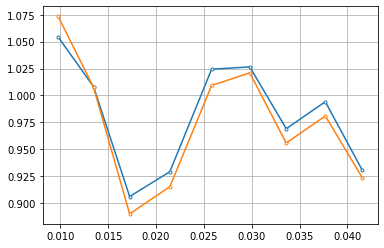

In [23]:
for nbar_i in [nbar, nbar2]:
    plt.plot(nbar_i['bin_avg'], nbar_i['nnbar'], marker='.', mfc='w')
    
plt.grid()

In [25]:
nbar_i['nnbar']

array([1.07355681, 1.00765124, 0.89008133, 0.91534609, 1.00927605,
       1.02101463, 0.9558564 , 0.98102045, 0.92345842])

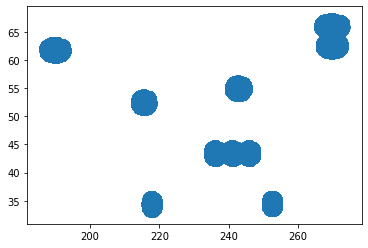

In [9]:
plt.scatter(r['RA'], r['DEC'])

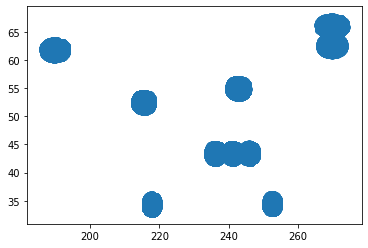

In [4]:
plt.scatter(d['RA'], d['DEC'])

['/home/mehdi/data/dr9v0.57.0/sv3nn_v1/regression/v0/sv3nn_BGS_ANY_NBMZLS_256/nn-weights.fits',
 '/home/mehdi/data/dr9v0.57.0/sv3nn_v1/regression/v0/sv3nn_BGS_ANY_NDECALS_256/nn-weights.fits',
 '/home/mehdi/data/dr9v0.57.0/sv3nn_v1/regression/v0/sv3nn_BGS_ANY_SDECALS_256/nn-weights.fits']

In [10]:
un, ct = np.unique(weights['hpix'], return_counts=True)

In [17]:
un[(ct > 1)].size / ct.size

0.0027059867567752064